In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('Cross-sectional Time-series sample data.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company Name      6167 non-null   object        
 1   Periods           6167 non-null   datetime64[ns]
 2   Ticker            6167 non-null   object        
 3   Universe Returns  6146 non-null   float64       
 4   Region            6167 non-null   object        
 5   Country           6167 non-null   object        
 6   Sector            6167 non-null   object        
 7   F1                6152 non-null   float64       
 8   F2                6156 non-null   float64       
 9   F3                5449 non-null   float64       
 10  MCAP              6157 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 530.1+ KB


In [8]:
# 구간별 z-score를 구하려면 어떤 값이 필요할지?
# 구간별 / 국가별 Factor의 평균과 분산.
# 각 팩터 값들을 해당 구간의 평균과 분산으로 나눠주기.

F1_mean_groupby_periods_country = df.groupby(['Periods', 'Country'])['F1'].mean().to_frame()

In [41]:
F1_mean_groupby_periods_country = F1_mean_groupby_periods_country.rename({
    'F1': 'F1_mean_by_periods_country'
}, axis=1)

In [42]:
F1_mean_groupby_periods_country = F1_mean_groupby_periods_country.reset_index()

In [43]:
F1_mean_groupby_periods_country

,Periods,Country,F1_mean_by_periods_country
0,2021-12-31,Australia,0.466452
1,2021-12-31,Austria,1.148000
2,2021-12-31,Belgium,0.862500
3,2021-12-31,Canada,0.605056
4,2021-12-31,Denmark,0.383333
...,...,...,...
87,2022-03-31,Spain,0.947222
88,2022-03-31,Sweden,0.510682
89,2022-03-31,Switzerland,0.514000
90,2022-03-31,United Kingdom,0.902469


In [31]:
#F1_mean_groupby_periods_country = F1_mean_groupby_periods_country.reset_index()
#F1_mean_groupby_periods_country = F1_mean_groupby_periods_country.set_index('Periods')

In [30]:
import seaborn as SNS

In [ ]:
import pandas as pd

In [ ]:
# 절대경로 불러오는 예시
df = pd.read_csv('C:/Users/jchoi02/Documents/dataset/Cross-Sectional Analysis - Sample data.csv')

In [ ]:
# 상대경로를 불러오는 예시
df = pd.read_csv('Cross-Sectional Analysis - Sample data.csv')

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## EDA

In [ ]:
df

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,"5,365.9",0.1,0.0,NaN
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,"2,147.2",1.1,3.8,103.1
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,"14,320.7",0.9,3.5,16.1
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,"84,749.9",0.2,4.0,6.8
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,"1,746.6",1.1,3.5,5.2
...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,"6,911.6",1.3,8.2,47.8
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,"6,286.9",0.1,2.2,38.5
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,"18,071.6",0.0,0.0,NaN
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,"15,444.2",0.5,2.3,NaN


In [ ]:
df['Country'].unique()

array(['United States', 'China', 'United Kingdom', 'Denmark', 'Sweden',
       'Switzerland', 'Saudi Arabia', 'Netherlands', 'Philippines',
       'South Africa', 'United Arab Emirates', 'India', 'Ireland',
       'France', 'Taiwan', 'Spain', 'Norway', 'Germany', 'Thailand',
       'Japan', 'Belgium', 'Kuwait', 'Canada', 'Hong Kong', 'Turkey',
       'Mexico', 'Luxembourg', 'Brazil', 'Greece', 'South Korea',
       'Malaysia', 'Italy', 'Australia', 'Bermuda', 'Singapore',
       'New Zealand', 'Israel', 'Chile', 'Colombia', 'Poland', 'Qatar',
       'Czech Republic', 'Hungary', '@NA', 'Egypt', 'Peru', 'Portugal',
       'Finland', 'Austria', 'Uruguay', 'Indonesia', 'Macau'],
      dtype=object)

In [ ]:
len(df['Country'].unique())

52

In [ ]:
df['Sector'].unique()

array(['Health Care', 'Financials', 'Industrials', 'Real Estate',
       'Information Technology', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Materials',
       'Communication Services', 'Energy'], dtype=object)

In [49]:
F1_mean_groupby_periods_country.pivot(index = 'Periods', columns = 'Country', values = 'F1_mean_by_periods_country')

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
2021-12-31,0.466452,1.148,0.862500,0.605056,0.383333,0.834545,1.034058,1.033607,0.414000,0.490,...,0.666957,0.203333,0.485000,1.1550,0.434737,0.916111,0.426364,0.47700,0.885357,0.452584
2022-01-31,0.519508,1.186,0.900833,0.618764,0.410000,0.927273,1.053824,1.056557,0.403143,0.534,...,0.692174,0.236667,0.494167,1.0900,0.433158,0.920556,0.482727,0.50325,0.887683,0.473158
2022-02-28,0.526441,1.486,0.894167,0.635000,0.449444,1.037273,1.084559,1.244098,0.396857,0.586,...,0.698696,0.220000,0.530833,1.1675,0.443158,0.972222,0.509091,0.52000,0.923086,0.483333
2022-03-31,0.486949,1.672,0.875833,0.615000,0.451111,1.296364,1.138088,1.378361,0.418857,0.650,...,0.733333,0.206667,0.495000,1.0500,0.400500,0.947222,0.510682,0.51400,0.902469,0.472432


In [51]:
# EMA

F1_mean_groupby_periods_country.pivot(index = 'Periods', columns = 'Country', values = 'F1_mean_by_periods_country').ewm(2).mean()

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
2021-12-31,0.466452,1.148000,0.862500,0.605056,0.383333,0.834545,1.034058,1.033607,0.414000,0.490000,...,0.666957,0.203333,0.485000,1.155000,0.434737,0.916111,0.426364,0.477000,0.885357,0.452584
2022-01-31,0.498286,1.170800,0.885500,0.613281,0.399333,0.890182,1.045917,1.047377,0.407486,0.516400,...,0.682087,0.223333,0.490500,1.116000,0.433789,0.918778,0.460182,0.492750,0.886753,0.464928
2022-02-28,0.511622,1.320105,0.889605,0.623569,0.423070,0.959856,1.064221,1.140561,0.402451,0.549368,...,0.689954,0.221754,0.509605,1.140395,0.438227,0.944094,0.483349,0.505658,0.903963,0.473646
2022-03-31,0.501373,1.466277,0.883885,0.620010,0.434718,1.099636,1.094904,1.239339,0.409266,0.591169,...,0.707973,0.215487,0.503538,1.102846,0.422556,0.945393,0.494703,0.509123,0.903343,0.473142


In [52]:
pivoted_df = F1_mean_groupby_periods_country.pivot(index = 'Periods', columns = 'Country', values = 'F1_mean_by_periods_country')

In [108]:
pivoted_df.corr()

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Country,,,,,,,,,,,,,,,,,,,,,
Australia,1.000000,0.141387,0.966921,0.892300,0.508875,0.075060,0.102282,0.116563,-0.865306,0.233277,...,0.209927,0.825602,0.743891,0.087085,0.400074,0.536280,0.668655,0.737228,0.565451,0.890442
Austria,0.141387,1.000000,0.030281,0.405851,0.923612,0.958575,0.973052,0.999425,0.205417,0.975446,...,0.911380,-0.294846,0.425018,-0.428825,-0.637851,0.757654,0.812681,0.771676,0.686307,0.576098
Belgium,0.966921,0.030281,1.000000,0.750962,0.392540,0.033984,0.047493,0.011256,-0.785225,0.169023,...,0.200528,0.931232,0.549227,-0.073985,0.325819,0.331640,0.606310,0.650517,0.353128,0.808110
Canada,0.892300,0.405851,0.750962,1.000000,0.707805,0.239562,0.284631,0.376476,-0.811080,0.407393,...,0.296936,0.484900,0.961042,0.265524,0.366481,0.844900,0.744113,0.832850,0.872090,0.929094
Denmark,0.508875,0.923612,0.392540,0.707805,1.000000,0.853577,0.878194,0.912837,-0.166905,0.931741,...,0.860830,0.050891,0.674235,-0.312042,-0.382007,0.880225,0.959405,0.953857,0.831435,0.844888
Finland,0.075060,0.958575,0.033984,0.239562,0.853577,1.000000,0.998302,0.965922,0.356792,0.984256,...,0.980838,-0.230013,0.202462,-0.668057,-0.805775,0.564054,0.790268,0.713172,0.475302,0.497523
France,0.102282,0.973052,0.047493,0.284631,0.878194,0.998302,1.000000,0.978600,0.317824,0.990845,...,0.975786,-0.231228,0.255665,-0.625565,-0.772688,0.610636,0.808030,0.738266,0.525109,0.527513
Germany,0.116563,0.999425,0.011256,0.376476,0.912837,0.965922,0.978600,1.000000,0.236496,0.977013,...,0.918045,-0.307839,0.394114,-0.452709,-0.663368,0.735212,0.801971,0.756380,0.661438,0.554947
Hong Kong,-0.865306,0.205417,-0.785225,-0.811080,-0.166905,0.356792,0.317824,0.236496,1.000000,0.187881,...,0.265018,-0.708482,-0.756885,-0.558198,-0.800401,-0.419617,-0.276973,-0.398176,-0.494364,-0.626421


In [60]:
# WMA
import numpy as np

weights = np.array([25, 25, 50])
sum_of_weights = np.sum(weights)

wma_df = pivoted_df.rolling(3).apply(lambda x :np.sum(x * weights) / sum_of_weights)

In [67]:
wma_df.reset_index()

Country,Periods,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
0,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-28,0.509710,1.3265,0.887917,0.623455,0.423056,0.959091,1.06425,1.144590,0.402714,...,0.689130,0.2200,0.510208,1.145000,0.438553,0.945278,0.481818,0.505062,0.904803,0.473102
3,2022-03-31,0.504962,1.5040,0.886667,0.620941,0.440417,1.139318,1.10364,1.264344,0.409429,...,0.714384,0.2175,0.503750,1.089375,0.419329,0.946806,0.503295,0.512813,0.903927,0.475339


In [72]:
list(wma_df.columns)

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [75]:
pd.melt(wma_df.reset_index(), id_vars ='Periods', value_vars=list(wma_df.columns), var_name='Country', value_name='WMA_F1')

,Periods,Country,WMA_F1
0,2021-12-31,Australia,NaN
1,2022-01-31,Australia,NaN
2,2022-02-28,Australia,0.509710
3,2022-03-31,Australia,0.504962
4,2021-12-31,Austria,NaN
...,...,...,...
87,2022-03-31,United Kingdom,0.903927
88,2021-12-31,United States,NaN
89,2022-01-31,United States,NaN
90,2022-02-28,United States,0.473102


In [56]:
pivoted_df.rolling(3).apply(lambda x : x.mean())

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-28,0.504133,1.273333,0.885833,0.619607,0.414259,0.93303,1.057480,1.111421,0.404667,0.536667,...,0.685942,0.220000,0.503333,1.1375,0.437018,0.936296,0.472727,0.500083,0.898709,0.469692
2022-03-31,0.510966,1.448000,0.890278,0.622921,0.436852,1.08697,1.092157,1.226339,0.406286,0.590000,...,0.708068,0.221111,0.506667,1.1025,0.425605,0.946667,0.500833,0.512417,0.904413,0.476308


In [85]:
plot_data = F1_mean_groupby_periods_country[F1_mean_groupby_periods_country['Country'].isin(['United Kingdom'])]

In [102]:
help(SNS.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

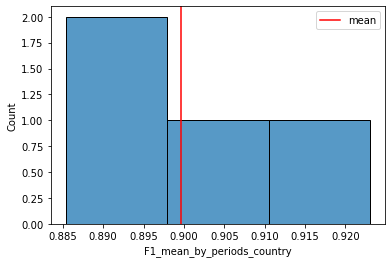

In [107]:
SNS.histplot(plot_data, x='F1_mean_by_periods_country')
plt.axvline(x = plot_data['F1_mean_by_periods_country'].mean(), color='red', label='mean')
plt.legend()

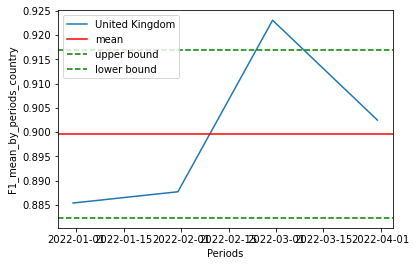

In [100]:
import matplotlib.pyplot as plt
SNS.lineplot(data=plot_data, x='Periods', y='F1_mean_by_periods_country', hue='Country')
plt.axhline(y = plot_data['F1_mean_by_periods_country'].mean(), color='red', label='mean')
plt.axhline(y = plot_data['F1_mean_by_periods_country'].mean() + plot_data['F1_mean_by_periods_country'].std(), color='green', ls='--', label='upper bound')
plt.axhline(y = plot_data['F1_mean_by_periods_country'].mean() - plot_data['F1_mean_by_periods_country'].std(), color='green', ls='--', label='lower bound')
plt.legend()

In [ ]:
import pandas as pd

In [ ]:
# 절대경로 불러오는 예시
df = pd.read_csv('C:/Users/jchoi02/Documents/dataset/Cross-Sectional Analysis - Sample data.csv')

In [ ]:
# 상대경로를 불러오는 예시
df = pd.read_csv('Cross-Sectional Analysis - Sample data.csv')

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## EDA

In [ ]:
df

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,"5,365.9",0.1,0.0,NaN
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,"2,147.2",1.1,3.8,103.1
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,"14,320.7",0.9,3.5,16.1
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,"84,749.9",0.2,4.0,6.8
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,"1,746.6",1.1,3.5,5.2
...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,"6,911.6",1.3,8.2,47.8
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,"6,286.9",0.1,2.2,38.5
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,"18,071.6",0.0,0.0,NaN
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,"15,444.2",0.5,2.3,NaN


In [ ]:
df['Country'].unique()

array(['United States', 'China', 'United Kingdom', 'Denmark', 'Sweden',
       'Switzerland', 'Saudi Arabia', 'Netherlands', 'Philippines',
       'South Africa', 'United Arab Emirates', 'India', 'Ireland',
       'France', 'Taiwan', 'Spain', 'Norway', 'Germany', 'Thailand',
       'Japan', 'Belgium', 'Kuwait', 'Canada', 'Hong Kong', 'Turkey',
       'Mexico', 'Luxembourg', 'Brazil', 'Greece', 'South Korea',
       'Malaysia', 'Italy', 'Australia', 'Bermuda', 'Singapore',
       'New Zealand', 'Israel', 'Chile', 'Colombia', 'Poland', 'Qatar',
       'Czech Republic', 'Hungary', '@NA', 'Egypt', 'Peru', 'Portugal',
       'Finland', 'Austria', 'Uruguay', 'Indonesia', 'Macau'],
      dtype=object)

In [ ]:
len(df['Country'].unique())

52

In [ ]:
df['Sector'].unique()

array(['Health Care', 'Financials', 'Industrials', 'Real Estate',
       'Information Technology', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Materials',
       'Communication Services', 'Energy'], dtype=object)

In [ ]:
len(df['Sector'].unique())

11

In [12]:
F1_std_groupby_periods_country = df.groupby(['Periods', 'Country'])['F1'].std().to_frame()
F1_std_groupby_periods_country = F1_std_groupby_periods_country.rename({
    'F1': 'F1_std_by_periods_country'
}, axis=1)

In [14]:
merged_df = pd.merge(df, F1_mean_groupby_periods_country, on=['Periods', 'Country'], how='left')

In [17]:
merged_df = pd.merge(merged_df, F1_std_groupby_periods_country, on=['Periods', 'Country'], how='left')

In [19]:
merged_df['F1_z'] = (merged_df['F1'] - merged_df['F1_mean_by_periods_country']) / (merged_df['F1_std_by_periods_country'])

In [20]:
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,F1,F2,F3,MCAP,F1_mean_by_periods_country,F1_std_by_periods_country,F1_z
0,"Huntington Ingalls Industries, Inc.",2021-12-31,HII-US,0.25,North America,United States,4010,1.29,2.53,16.06,7480.990802,0.452584,0.775638,1.079648
1,Royal Caribbean Group,2021-12-31,RCL-US,1.18,North America,United States,1510,0.03,0.00,-425.40,19593.339138,0.452584,0.775638,-0.544820
2,Discovery A,2021-12-31,@NA,NaN,North America,United States,@NA,NaN,NaN,NaN,NaN,0.452584,0.775638,NaN
3,NXP Semiconductors NV,2021-12-31,NXPI-US,-9.81,North America,United States,5510,0.17,0.99,48.10,60574.277196,0.452584,0.775638,-0.364324
4,AGNC Investment Corp.,2021-12-31,AGNC-US,-0.20,North America,United States,3025,0.29,9.57,100.00,7894.622109,0.452584,0.775638,-0.209613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,Discovery A,2022-03-31,@NA,NaN,North America,United States,@NA,NaN,NaN,NaN,NaN,0.472432,0.738103,NaN
6163,IAC/InteractiveCorp.,2022-03-31,IAC-US,-17.35,North America,United States,5520,0.41,0.00,61.54,8420.855139,0.472432,0.738103,-0.084584
6164,Huntington Bancshares Incorporated,2022-03-31,HBAN-US,-10.05,North America,United States,3010,0.28,4.24,NaN,21123.365606,0.472432,0.738103,-0.260712
6165,"Huntington Ingalls Industries, Inc.",2022-03-31,HII-US,6.67,North America,United States,4010,1.17,2.37,14.36,7990.962846,0.472432,0.738103,0.945083
